# Homework 5 Lab: Forecasting Points Per Game (PPG) Part II

As in Homework 4 Lab, we will be using data scraped from https://www.basketball-reference.com/ to explore different forecasting strategies to predict who will have the highest PPG in the NBA in a particular week. We'll use data from the 2020-21 NBA season between December 2020 and March 2021 to forecast the highest PPG players in April 2021, the final month of the regular season. Part I focused on the **reference class forecasting** approach. Here we will explore a different approach, **decomposition into parts**. This lab has many open-ended questions, and there is often not one correct answer. We will grade submissions mostly based on your reasoning. 

## Gradescope Submission 
To submit this assignment, rerun the notebook from scratch (by selecting Kernel > Restart & Run all), and then print as a pdf (File > download as > pdf) and submit it to Gradescope. You are also welcome to use R or another language if you are more comfortable with data analysis in that language.


**This assignment should be completed and submitted before Monday, February 21, 2022 at 11:59 PM. PT**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Data
We are using the same raw data as in the previous lab, which is in the file "scraped_games_2020-21.csv". 

In [3]:
df = pd.read_csv("scraped_games_2020-21.csv", index_col=0, parse_dates=['Date'])
df.head()

,Date,Player,Pts
0,2020-12-22,"Wiggins,Andrew",13
1,2020-12-22,"Curry,Stephen",20
2,2020-12-22,"Oubre,Kelly",6
3,2020-12-22,"Wiseman,James",19
4,2020-12-22,"Paschall,Eric",6


### Optional preprocessing steps

In [4]:
# Split into pre-April and April data; here we'ved named them train and test but the variable names don't matter.
df_train = df[df["Date"] < "2021-3-29"]
df_test = df[df["Date"] >= "2021-3-29"]

In [5]:
# We group the games by week and find the total points scored by each player that week
# The flag freq='W-MON' will group data weekly on Mondays as described in https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
df_train_weekly = df_train.groupby([pd.Grouper(key='Date', freq='W-MON'), 'Player'])['Pts'].sum().reset_index().sort_values(['Date', 'Pts'], ascending=[True,False])
df_test_weekly = df_test.groupby([pd.Grouper(key='Date', freq='W-MON'), 'Player'])['Pts'].sum().reset_index().sort_values(['Date', 'Pts'], ascending=[True,False])

# Approach: Forecasting by decomposition

A different approach is to break down the outcome we're interested in into its component parts and analyze these parts. For this PPG question, we can calculate each player's average PPG over a week and their standard deviation. Then we can fit a distribution to this average and standard deviation and by sampling, predict the probability that each player will have the highest PPG in a future week.

For example, we can find how many total points Stephen Curry scored in each week:

In [23]:
df_train_weekly[df_train_weekly.Player == "Curry,Stephen"]

,Date,Player,Pts
91,2020-12-28,"Curry,Stephen",75
480,2021-01-04,"Curry,Stephen",149
903,2021-01-11,"Curry,Stephen",62
1289,2021-01-18,"Curry,Stephen",81
1653,2021-01-25,"Curry,Stephen",116
2031,2021-02-01,"Curry,Stephen",71
2423,2021-02-08,"Curry,Stephen",155
2803,2021-02-15,"Curry,Stephen",135
3178,2021-02-22,"Curry,Stephen",54
3526,2021-03-01,"Curry,Stephen",106


We can plot a histogram of the point distribution and visualize that it is pretty noisy:

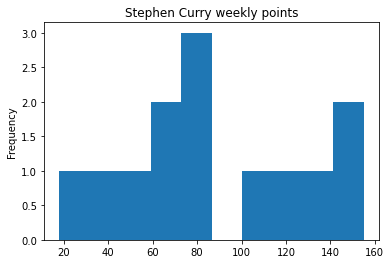

In [22]:
plt.figure()
plt.title("Stephen Curry weekly points")
plt.ylabel("Frequency")
plt.hist(df_train_weekly[df_train_weekly.Player == "Curry,Stephen"]['Pts'])
plt.show()

## Q1. Using a Gaussian approximation

For at least 10 players that seem like contenders for getting the highest PPG (you choose the players, and you can also do this for more than 10 players):

a) Compute their mean total points per week and standard deviation.

b) Approximate each player's weekly points with an independent Gaussian distribution. Using these Gaussian approximations, calculate or simulate each of the players' probabilities of getting the highest PPG in a future week. (i.e., make a forecast that assigns a probability $q_i$ to each player).

In [24]:
# space for work

## Q2. Modeling other players
Modify your forecast in Q1 to take into account the players other than the 10 you've examined so far. For example, some considerations you might think about include: are the players you ranked 9th and 10th very similar to 2, or 10, or 50 other players in the NBA, and should they split the probability density further?; which players have a vanishingly small probability of getting the highest PPG?

In [26]:
# space for work

## Q3. Evaluate the Gaussian approximation forecasts

Calculate the Brier quadratic score for the forecasts from Q1 and Q2. How do they compare to the Brier scores from the previous lab?

In [25]:
# space for work

## Q4.  Beyond Gaussians

a) For (at least) the 10 players in Q1 (but more is fine, too), plot a histogram of their weekly points like in the Stephen Curry example above, and superimpose the Q1 Gaussian distribution approximation on the histogram. (i.e., plot the Gaussian probability density function based on the mean and standard deviation calculated for that player). Note that you may need to scale the histogram units and/or the Gaussian pdf in order to get the histogram and the Gaussian pdf to look comparable.

b) Pick (at least) 2 players whose point distributions do not fit the Gaussian approximation well. Propose different distributions to approximate the data, and plot these curves on the histograms. Discuss why you chose these distributions, and if you fit the parameters of the distribution to the data, describe how.

In [27]:
# space for work

## Q5. Independence assumptions

a) So far in this decomposition approach, we have assumed that each player's points are independent of another's. What are some things that might cause points in a game to not be independent between players?

b) What are some ways you might quantify and model these dependencies?

In [28]:
# space for work